In [2]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict


In [5]:
data_vac = pd.read_csv('data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction_20240111.csv')
data_death = pd.read_csv('data/deaths_with_abbs.csv')

In [6]:
data_vac.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Dist_Bivalent_PFR,Dist_Bivalent_MOD,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,05/10/2023,19,NE,5481710,152400,1647380,2905630,7400.0,0,283379,...,575480.0,193420.0,340508.0,18.9,332054.0,20.5,319161.0,21.9,151146.0,48.4
1,05/10/2023,19,LA,10282120,330500,3807980,5164550,10100.0,0,221178,...,640590.0,328400.0,359506.0,8.3,356199.0,9.1,349934.0,9.8,184844.0,24.9
2,05/10/2023,19,GA,28727475,869100,9763000,14773655,43400.0,0,270569,...,2255000.0,1023320.0,1126791.0,11.3,1103841.0,12.3,1067468.0,13.2,476297.0,31.4
3,05/10/2023,19,WY,1281755,49300,490040,585605,3700.0,0,221466,...,102510.0,50600.0,65920.0,12.1,64919.0,13.2,63244.0,14.2,34832.0,35.1
4,05/10/2023,19,CO,17769135,501900,5402640,9029715,43600.0,0,308560,...,2033760.0,757520.0,1268501.0,23.4,1229981.0,24.9,1176686.0,26.2,462990.0,55.0


In [7]:
data_death.head()

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote,Location
0,01/11/2024,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,0.0,60170.0,98.0,4111.0,0.0,434.0,4545.0,NaN,NaN
1,01/11/2024,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,1.0,60734.0,97.0,4153.0,1.0,475.0,4628.0,NaN,NaN
2,01/11/2024,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,2.0,59362.0,98.0,4066.0,2.0,468.0,4534.0,NaN,NaN
3,01/11/2024,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,3.0,59162.0,99.0,3915.0,0.0,500.0,4418.0,NaN,NaN
4,01/11/2024,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58834.0,99.0,3818.0,0.0,481.0,4299.0,NaN,NaN


In [8]:
# creating a new column for year in order to merge our two datasets based on year
data_vac['year'] = pd.DatetimeIndex(data_vac['Date']).year

In [9]:
data_vac.dtypes

Date                                object
MMWR_week                            int64
Location                            object
Distributed                          int64
Distributed_Janssen                  int64
                                    ...   
Bivalent_Booster_18Plus            float64
Bivalent_Booster_18Plus_Pop_Pct    float64
Bivalent_Booster_65Plus            float64
Bivalent_Booster_65Plus_Pop_Pct    float64
year                                 int64
Length: 110, dtype: object

In [10]:
data_death.dtypes

Data as of                                   object
Start Date                                   object
End Date                                     object
Group                                        object
Year                                         object
Month                                       float64
MMWR Week                                   float64
Week Ending Date                             object
State                                        object
COVID-19 Deaths                             float64
Total Deaths                                float64
Percent of Expected Deaths                  float64
Pneumonia Deaths                            float64
Pneumonia and COVID-19 Deaths               float64
Influenza Deaths                            float64
Pneumonia, Influenza, or COVID-19 Deaths    float64
Footnote                                     object
Location                                     object
dtype: object

In [11]:
# dropping the rows that are formatted like 2019/2020 for example
data_death = data_death[data_death["Year"].str.contains("/")==False]

In [12]:
# converting year column to an integer 
data_death['Year'] = data_death['Year'].astype(int)

In [13]:
data_death.dtypes

Data as of                                   object
Start Date                                   object
End Date                                     object
Group                                        object
Year                                          int64
Month                                       float64
MMWR Week                                   float64
Week Ending Date                             object
State                                        object
COVID-19 Deaths                             float64
Total Deaths                                float64
Percent of Expected Deaths                  float64
Pneumonia Deaths                            float64
Pneumonia and COVID-19 Deaths               float64
Influenza Deaths                            float64
Pneumonia, Influenza, or COVID-19 Deaths    float64
Footnote                                     object
Location                                     object
dtype: object

We have prepared our two datasets to be merged. We will be merging on three columns so we ensured that the column types and relevant information aligned.

In [14]:
combined_data = data_vac.merge(data_death, left_on = ['MMWR_week', 'Location', 'year'], 
                                   right_on = ['MMWR Week', 'Location', 'Year'],
                                   how = 'left')
combined_data.shape

(38488, 127)

In [15]:
combined_data = combined_data[combined_data['MMWR_week'] <= 19]
covid_deaths = combined_data[~combined_data['COVID-19 Deaths'].isna()]

Next, we removed unnecessary columns after merging. Since we are only interested in COVID deaths (not pneumonia or influenza) and there are a few repeat columns (Location, MMWR Week, etc.), we can drop those columns.

In [16]:
list(covid_deaths.columns)

['Date',
 'MMWR_week',
 'Location',
 'Distributed',
 'Distributed_Janssen',
 'Distributed_Moderna',
 'Distributed_Pfizer',
 'Distributed_Novavax',
 'Distributed_Unk_Manuf',
 'Dist_Per_100K',
 'Distributed_Per_100k_5Plus',
 'Distributed_Per_100k_12Plus',
 'Distributed_Per_100k_18Plus',
 'Distributed_Per_100k_65Plus',
 'Administered',
 'Administered_5Plus',
 'Administered_12Plus',
 'Administered_18Plus',
 'Administered_65Plus',
 'Administered_Janssen',
 'Administered_Moderna',
 'Administered_Pfizer',
 'Administered_Novavax',
 'Administered_Unk_Manuf',
 'Admin_Per_100K',
 'Admin_Per_100k_5Plus',
 'Admin_Per_100k_12Plus',
 'Admin_Per_100k_18Plus',
 'Admin_Per_100k_65Plus',
 'Recip_Administered',
 'Administered_Dose1_Recip',
 'Administered_Dose1_Pop_Pct',
 'Administered_Dose1_Recip_5Plus',
 'Administered_Dose1_Recip_5PlusPop_Pct',
 'Administered_Dose1_Recip_12Plus',
 'Administered_Dose1_Recip_12PlusPop_Pct',
 'Administered_Dose1_Recip_18Plus',
 'Administered_Dose1_Recip_18PlusPop_Pct',
 'Ad

In [17]:
covid_deaths = covid_deaths.drop(['Data as of',
 'Start Date',
 'End Date',
 'Group',
 'Year',
 'Month',
 'MMWR Week',
 'Week Ending Date',
 'State', 
 'Total Deaths',
 'Percent of Expected Deaths',
 'Pneumonia Deaths',
 'Pneumonia and COVID-19 Deaths',
 'Influenza Deaths',
 'Pneumonia, Influenza, or COVID-19 Deaths',
 'Footnote'], axis=1)

In [18]:
# renaming covid deaths columns to be snake case
covid_deaths = covid_deaths.rename(columns={'COVID-19 Deaths': 'covid19_deaths'})

We manipulated the data further by changing the Date to an integer (date_delta) and getting dummies for Location.

In [19]:
covid_deaths['Date'] = pd.to_datetime(covid_deaths['Date'])
covid_deaths['date_delta'] = (covid_deaths['Date'] - covid_deaths['Date'].min())  / np.timedelta64(1,'D')

In [20]:
covid_deaths = pd.get_dummies(covid_deaths, columns=['Location'])

In [21]:
covid_deaths

,Date,MMWR_week,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,...,Location_SD,Location_TN,Location_TX,Location_UT,Location_VA,Location_VT,Location_WA,Location_WI,Location_WV,Location_WY
2,2023-05-10,19,28727475,869100,9763000,14773655,43400.0,0,270569,288404.0,...,0,0,0,0,0,0,0,0,0,0
4,2023-05-10,19,17769135,501900,5402640,9029715,43600.0,0,308560,327449.0,...,0,0,0,0,0,0,0,0,0,0
5,2023-05-10,19,42895735,1569200,13941120,21178525,87400.0,0,335071,354391.0,...,0,0,0,0,0,0,0,0,0,0
8,2023-05-10,19,16474175,457200,5144600,8183105,22900.0,0,282943,299970.0,...,0,0,0,0,0,0,0,1,0,0
10,2023-05-10,19,80813315,2667600,25478340,43584365,119500.0,0,278706,299253.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37214,2021-01-03,1,1122725,0,0,0,NaN,0,3872,0.0,...,0,0,1,0,0,0,0,0,0,0
37216,2021-01-03,1,889875,0,0,0,NaN,0,4143,0.0,...,0,0,0,0,0,0,0,0,0,0
37217,2021-01-03,1,466500,0,0,0,NaN,0,3991,0.0,...,0,0,0,0,0,0,0,0,0,0
37218,2021-01-03,1,339350,0,0,0,NaN,0,4923,0.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
covid_deaths.to_csv('covid_deaths.csv')

### checking for missing data

In [3]:
covid_data = pd.read_csv('data/covid_deaths.csv')

In [4]:
covid_data.head()

,Unnamed: 0,Date,MMWR_week,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Location_SD,Location_TN,Location_TX,Location_UT,Location_VA,Location_VT,Location_WA,Location_WI,Location_WV,Location_WY
0,2,2023-05-10,19,28727475,869100,9763000,14773655,43400.0,0,270569,...,0,0,0,0,0,0,0,0,0,0
1,4,2023-05-10,19,17769135,501900,5402640,9029715,43600.0,0,308560,...,0,0,0,0,0,0,0,0,0,0
2,5,2023-05-10,19,42895735,1569200,13941120,21178525,87400.0,0,335071,...,0,0,0,0,0,0,0,0,0,0
3,8,2023-05-10,19,16474175,457200,5144600,8183105,22900.0,0,282943,...,0,0,0,0,0,0,0,1,0,0
4,10,2023-05-10,19,80813315,2667600,25478340,43584365,119500.0,0,278706,...,0,0,1,0,0,0,0,0,0,0


In [5]:
contain_nulls = covid_data.columns[covid_data.isna().any()].tolist()
len(contain_nulls)

34

In [6]:
print(contain_nulls)

['Distributed_Novavax', 'Administered_Novavax', 'Series_Complete_Novavax', 'Series_Complete_Janssen_5Plus', 'Series_Complete_Moderna_5Plus', 'Series_Complete_Pfizer_5Plus', 'Series_Complete_Unk_Manuf_5Plus', 'Additional_Doses', 'Additional_Doses_5Plus', 'Additional_Doses_5Plus_Vax_Pct', 'Additional_Doses_12Plus', 'Additional_Doses_12Plus_Vax_Pct', 'Second_Booster', 'Second_Booster_50Plus', 'Second_Booster_50Plus_Vax_Pct', 'Second_Booster_65Plus', 'Second_Booster_65Plus_Vax_Pct', 'Second_Booster_Janssen', 'Second_Booster_Moderna', 'Second_Booster_Pfizer', 'Second_Booster_Unk_Manuf', 'Administered_Bivalent', 'Admin_Bivalent_PFR', 'Admin_Bivalent_MOD', 'Dist_Bivalent_PFR', 'Dist_Bivalent_MOD', 'Bivalent_Booster_5Plus', 'Bivalent_Booster_5Plus_Pop_Pct', 'Bivalent_Booster_12Plus', 'Bivalent_Booster_12Plus_Pop_Pct', 'Bivalent_Booster_18Plus', 'Bivalent_Booster_18Plus_Pop_Pct', 'Bivalent_Booster_65Plus', 'Bivalent_Booster_65Plus_Pop_Pct']


In [7]:
dict_null_columns = {}
for x in contain_nulls:
    dict_null_columns[x] = covid_data[x].isna().sum()

In [8]:
print(dict_null_columns)

{'Distributed_Novavax': 11808, 'Administered_Novavax': 11808, 'Series_Complete_Novavax': 11808, 'Series_Complete_Janssen_5Plus': 5971, 'Series_Complete_Moderna_5Plus': 5971, 'Series_Complete_Pfizer_5Plus': 5971, 'Series_Complete_Unk_Manuf_5Plus': 5971, 'Additional_Doses': 5971, 'Additional_Doses_5Plus': 11808, 'Additional_Doses_5Plus_Vax_Pct': 11808, 'Additional_Doses_12Plus': 7213, 'Additional_Doses_12Plus_Vax_Pct': 7213, 'Second_Booster': 12535, 'Second_Booster_50Plus': 10973, 'Second_Booster_50Plus_Vax_Pct': 10973, 'Second_Booster_65Plus': 10973, 'Second_Booster_65Plus_Vax_Pct': 10973, 'Second_Booster_Janssen': 10973, 'Second_Booster_Moderna': 10973, 'Second_Booster_Pfizer': 10973, 'Second_Booster_Unk_Manuf': 10973, 'Administered_Bivalent': 11808, 'Admin_Bivalent_PFR': 11808, 'Admin_Bivalent_MOD': 11808, 'Dist_Bivalent_PFR': 11808, 'Dist_Bivalent_MOD': 11808, 'Bivalent_Booster_5Plus': 11808, 'Bivalent_Booster_5Plus_Pop_Pct': 11808, 'Bivalent_Booster_12Plus': 11808, 'Bivalent_Booster

There are 34 columns with null values. Above is a dictionary of each column and the sum of the null values in that column.

### initial eda / look at distribution

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'MMWR_week'}>,
        <AxesSubplot:title={'center':'Distributed'}>,
        <AxesSubplot:title={'center':'Distributed_Janssen'}>,
        <AxesSubplot:title={'center':'Distributed_Moderna'}>,
        <AxesSubplot:title={'center':'Distributed_Pfizer'}>,
        <AxesSubplot:title={'center':'Distributed_Novavax'}>,
        <AxesSubplot:title={'center':'Distributed_Unk_Manuf'}>,
        <AxesSubplot:title={'center':'Dist_Per_100K'}>,
        <AxesSubplot:title={'center':'Distributed_Per_100k_5Plus'}>,
        <AxesSubplot:title={'center':'Distributed_Per_100k_12Plus'}>,
        <AxesSubplot:title={'center':'Distributed_Per_100k_18Plus'}>,
        <AxesSubplot:title={'center':'Distributed_Per_100k_65Plus'}>],
       [<AxesSubplot:title={'center':'Administered'}>,
        <AxesSubplot:title={'center':'Administered_5Plus'}>,
        <AxesSubplot:title={'center':'Administered_12Plus'}>,
        <AxesSub

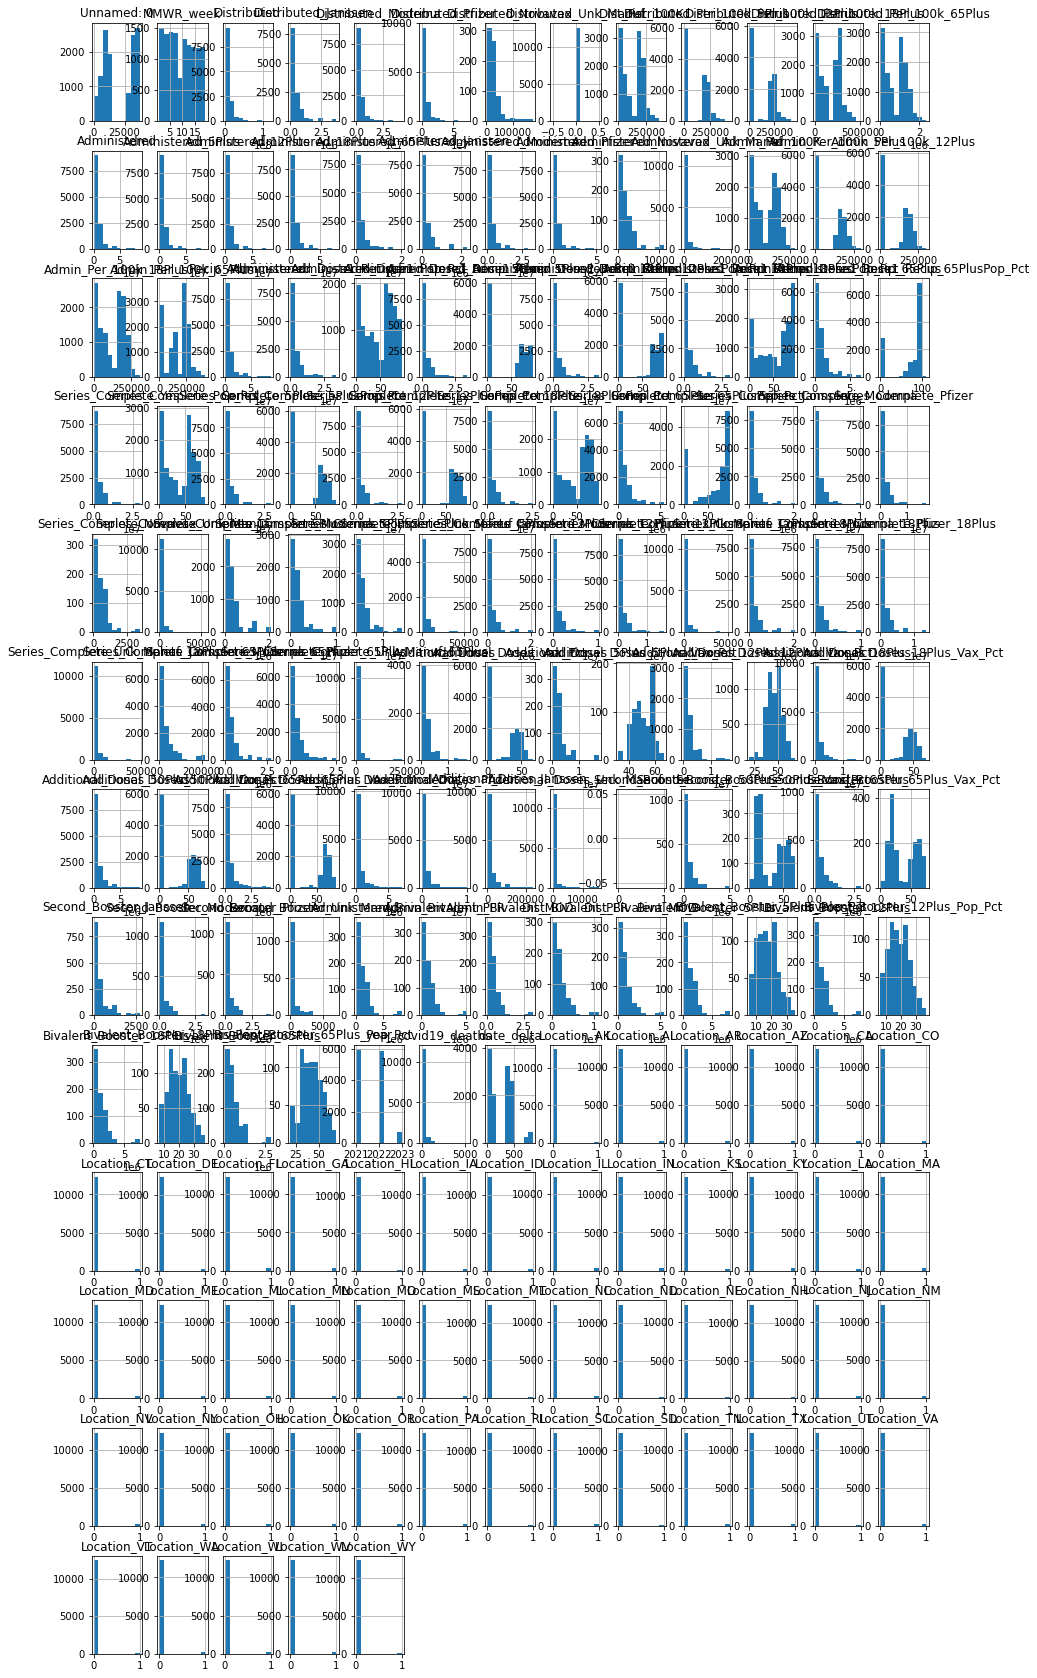

In [10]:
# brief EDA
covid_data.hist(figsize=(15,30))

Histogram distribution

In [11]:
nums = list(covid_data.select_dtypes(exclude=['object']).columns)

variable_dist = pd.DataFrame(columns=['Variable', 'Type', 'Missing', 'Unique', "Mean", "Std", "Min", "Max"])

for column in nums:
    dtype = str(covid_data[column].dtype)
    missing = covid_data[column].isna().sum()
    unique = covid_data[column].nunique(dropna=False)
    mean = covid_data[column].mean()
    std = covid_data[column].std()
    min_val = covid_data[column].min()
    max_val = covid_data[column].max()
    variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)

display(variable_dist)

/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variable_dist = variable_dist.append({'Variable': column, 'Type': dtype, 'Missing': missing, 'Unique': unique, 'Mean': mean, 'Std': std, 'Min': min_val, 'Max': max_val}, ignore_index=True)
/var/folders/_r/zhgqwmg93t93tgtk01b4xvtc0000gn/T/ipykernel_97790/3204654346.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

,Variable,Type,Missing,Unique,Mean,Std,Min,Max
0,Unnamed: 0,int64,0,12535,20263.105465,12541.068842,2,37219
1,MMWR_week,int64,0,19,9.538652,5.465801,1,19
2,Distributed,int64,0,9334,9918513.126047,14416948.350845,28125,121107865
3,Distributed_Janssen,int64,0,3205,421026.290387,625843.535644,0,3785200
4,Distributed_Moderna,int64,0,6576,3630003.676107,5193545.032632,0,42594960
...,...,...,...,...,...,...,...,...
156,Location_VT,int64,0,2,0.005744,0.075574,0,1
157,Location_WA,int64,0,2,0.022736,0.149068,0,1
158,Location_WI,int64,0,2,0.022736,0.149068,0,1
159,Location_WV,int64,0,2,0.022337,0.147784,0,1


A table with a look into the statistical distribution

### Train Test Split

In [31]:
y = covid_deaths.covid19_deaths
X = covid_deaths.drop(['covid19_deaths'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)